# Funciones de distribución de probabilidades

## Distribución Uniforme

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100185.,  99714., 100055.,  99846.,  99702., 100031., 100028.,
        100185., 100260.,  99994.]),
 array([ 1.00015513, 10.90013686, 20.80011858, 30.70010031, 40.60008204,
        50.50006377, 60.4000455 , 70.30002723, 80.20000895, 90.09999068,
        99.99997241]),
 <BarContainer object of 10 artists>)

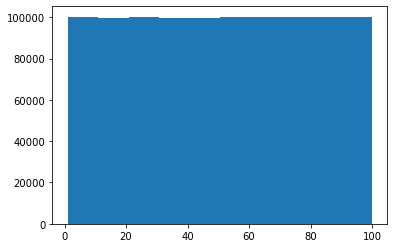

In [30]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [31]:
data = np.random.randn(1000000)

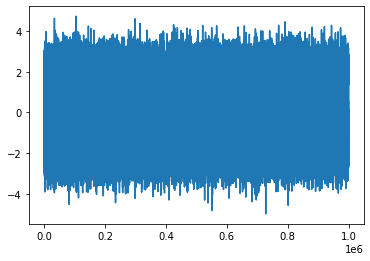

In [32]:
x = range(1,1000001)
plt.plot(x, data)

(array([2.50000e+01, 1.14300e+03, 1.80110e+04, 1.16040e+05, 3.12869e+05,
        3.51355e+05, 1.65387e+05, 3.24980e+04, 2.58500e+03, 8.70000e+01]),
 array([-4.98364841, -4.01302687, -3.04240534, -2.0717838 , -1.10116227,
        -0.13054073,  0.8400808 ,  1.81070234,  2.78132387,  3.75194541,
         4.72256694]),
 <BarContainer object of 10 artists>)

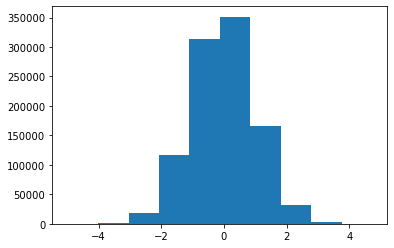

In [33]:
%matplotlib inline
plt.hist(data)

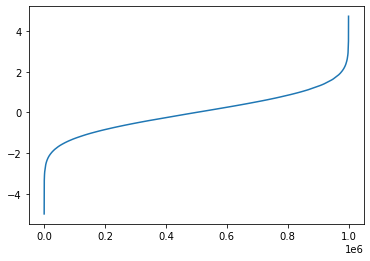

In [34]:
plt.plot(x,sorted(data))

(array([   4.,   58.,  348., 1269., 2529., 2895., 1962.,  754.,  158.,
          23.]),
 array([-4.5036587 , -2.60071592, -0.69777313,  1.20516965,  3.10811244,
         5.01105523,  6.91399801,  8.8169408 , 10.71988358, 12.62282637,
        14.52576915]),
 <BarContainer object of 10 artists>)

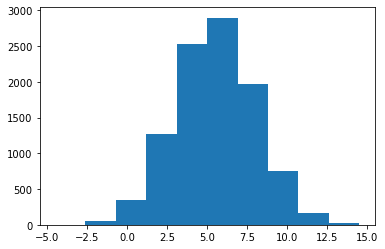

In [35]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [36]:
data = np.random.randn(2,4)
data

array([[ 0.96968395, -1.63850423, -1.28464602,  0.81967371],
       [-0.65729404,  0.88346083, -1.81825721,  1.75880512]])

## La simulación de Monte Carlo
* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos : z = x2 + y2
    * Si z < 1  estamos dentro del círculo.
    * Si z >= 1 estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.

In [37]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1423680000000003


(3.1423680000000003, [<matplotlib.lines.Line2D at 0x2a5af73b850>])

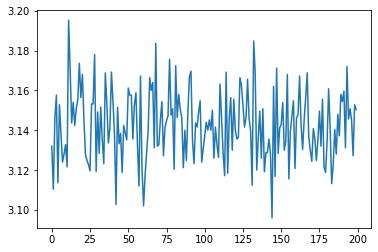

In [38]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [39]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [40]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001200,1.499576,18.507219
std,1.000067,2.499367,7.790627
min,-4.861327,-10.176847,5.000014
25%,-0.675598,-0.186513,11.767952
50%,-0.001823,1.499007,18.510796
75%,0.674080,3.186559,25.247771
max,4.952216,12.726367,31.999971


(array([5.90000e+01, 1.86700e+03, 2.57730e+04, 1.47183e+05, 3.43908e+05,
        3.29275e+05, 1.29640e+05, 2.09970e+04, 1.27100e+03, 2.70000e+01]),
 array([-4.86132706, -3.87997273, -2.89861841, -1.91726408, -0.93590975,
         0.04544458,  1.0267989 ,  2.00815323,  2.98950756,  3.97086188,
         4.95221621]),
 <BarContainer object of 10 artists>)

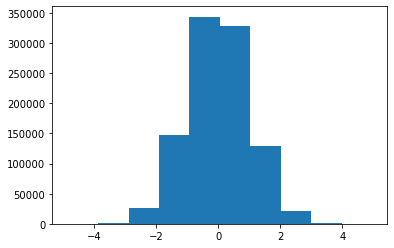

In [41]:
plt.hist(data["A"])

(array([8.50000e+01, 2.17200e+03, 2.50980e+04, 1.29782e+05, 3.06845e+05,
        3.31913e+05, 1.63284e+05, 3.69180e+04, 3.74200e+03, 1.61000e+02]),
 array([-10.17684682,  -7.8865254 ,  -5.59620399,  -3.30588258,
         -1.01556117,   1.27476024,   3.56508165,   5.85540307,
          8.14572448,  10.43604589,  12.7263673 ]),
 <BarContainer object of 10 artists>)

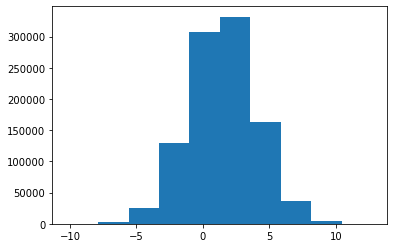

In [42]:
plt.hist(data["B"])

(array([ 99668.,  99907.,  99787., 100379.,  99869., 100213., 100034.,
        100120.,  99741., 100282.]),
 array([ 5.00001412,  7.70000978, 10.40000544, 13.1000011 , 15.79999676,
        18.49999242, 21.19998808, 23.89998374, 26.59997941, 29.29997507,
        31.99997073]),
 <BarContainer object of 10 artists>)

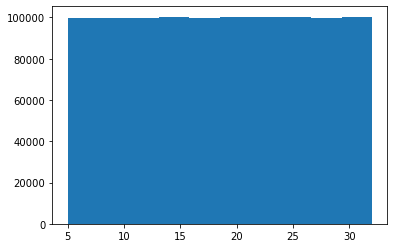

In [43]:
plt.hist(data["C"])

In [44]:
data = pd.read_csv("/Users/Gullermo R/OneDrive/Documentos/GitHub/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [45]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [48]:
colum_names = data.columns.values.tolist()
colum_names

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [23]:
a = len(colum_names)
a

21

In [24]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [25]:
new_data

,Column Name,A,B
42,State,-0.753692,0.101478
43,Account Length,0.500999,0.408961
44,Area Code,1.652420,0.305809
45,Phone,-0.636298,0.947744
46,Int'l Plan,-0.756659,0.946886
47,VMail Plan,0.645186,0.858648
48,VMail Message,1.356450,0.280912
49,Day Mins,1.693835,0.677916
50,Day Calls,1.242912,0.444258
51,Day Charge,0.708980,0.283804
